<h1>Bryan</h1>

<p>
Hi, I'm a 1A student in Sofware Engineering. During my first two weeks on campus, I couln't help but notice the amound of geese everywhere.So I decided to make them part of my project! I collected a few goose photos and applied <b>K-Means color clustering</b> to them, which results in a cartoonish look
</p>  
</p>

## Basic Imports

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
import cv2


In [46]:
from sklearn.cluster import KMeans

### Image Loading and Color Conversion  
- Load two goose images from the web into NumPy arrays  
- Convert color format: OpenCV uses **BGR**, most libraries use **RGB**

In [60]:
#Load images
goose_one = "https://cdn.theatlantic.com/thumbor/hI-unBplRatTNq6h5lwrMinSaFA=/0x101:3000x1789/960x540/media/img/mt/2019/10/AP_101007030758/original.jpg"
goose_two = "https://base-prod.rspb-prod.magnolia-platform.com/.imaging/focalpoint/_WIDTH_x_HEIGHT_/dam/jcr:7d2047d9-2411-40ae-af94-5bb3233d1e70/2097541234-Species-Canada-Goose-Flying-to-left.jpg"
paths = [goose_one, goose_two]
def load_image_from_url(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url,stream=True, headers=headers).content
    print(response)
    img = np.asarray(bytearray(response), dtype = np.uint8)
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return img 



### Flatten Image  
- original shape: (height, width, channel(RBG)), basically 3D array  
- flatten out to become 2D array of just RGB channels [ [r,g,b] ,[ r,g,b], .... ]


In [49]:
def flatten_image(img):
   image_as_array = img
   height, width, channel = image_as_array.shape
   image_as_2d = image_as_array.reshape(height*width, channel) 
   return image_as_2d, height, width, channel

### KMeans Clustering
- Unsupervised learning to cluster RGB values   
- Gives 6 average channels associated to a color
- Assigns one color to every pixel in a new quantized NP array (new image)
- Reshapes the quantized image according to (height, width, channel) to be displayable on pyplot

In [50]:
def quantize(img):
    image_2d, height, width, channel = flatten_image(img)
    model = KMeans(n_clusters=6)
    img_w_labels = model.fit_predict(image_2d)
    cluster_rgb = model.cluster_centers_.round(0).astype(int)
    quantized_img = cluster_rgb[img_w_labels]
    quantized_img = np.reshape(quantized_img, (height,width,channel))
    return quantized_img




In [58]:
quantized = []
for  index, image_link in enumerate(paths):
    quantized.append(quantize(load_image_from_url(image_link)))
    



b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe1\x19HExif\x00\x00II*\x00\x08\x00\x00\x00\x0e\x00\x0f\x01\x02\x00\x06\x00\x00\x00\xb6\x00\x00\x00\x10\x01\x02\x00\r\x00\x00\x00\xbc\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00\xc9\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\xd1\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x001\x01\x02\x00\x1c\x00\x00\x00\xd9\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00\xf5\x00\x00\x00>\x01\x05\x00\x02\x00\x00\x00\t\x01\x00\x00?\x01\x05\x00\x06\x00\x00\x00\x19\x01\x00\x00\x11\x02\x05\x00\x03\x00\x00\x00I\x01\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00d\x01\x00\x00%\x88\x04\x00\x01\x00\x00\x00x\x04\x00\x00\x8c\x04\x00\x00Canon\x00Canon EOS 7D\x00\xc0\xc6-\x00\x10\'\x00\x00\xc0\xc6-\x00\x10\'\x00\x00Adobe Photoshop CS2 Windows\x002010:10:07 17:31:55\x009\x01\x00\x00\xe8\x03\x00\x00I\x01\x00\x00\xe8\x03\x00\x00@\x00\x00\x00d\x00\x00\x00!\x

### Displaying Images Next to Each Other  
- Basic Pyplot

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe1\x19HExif\x00\x00II*\x00\x08\x00\x00\x00\x0e\x00\x0f\x01\x02\x00\x06\x00\x00\x00\xb6\x00\x00\x00\x10\x01\x02\x00\r\x00\x00\x00\xbc\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00\xc9\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\xd1\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x001\x01\x02\x00\x1c\x00\x00\x00\xd9\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00\xf5\x00\x00\x00>\x01\x05\x00\x02\x00\x00\x00\t\x01\x00\x00?\x01\x05\x00\x06\x00\x00\x00\x19\x01\x00\x00\x11\x02\x05\x00\x03\x00\x00\x00I\x01\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00d\x01\x00\x00%\x88\x04\x00\x01\x00\x00\x00x\x04\x00\x00\x8c\x04\x00\x00Canon\x00Canon EOS 7D\x00\xc0\xc6-\x00\x10\'\x00\x00\xc0\xc6-\x00\x10\'\x00\x00Adobe Photoshop CS2 Windows\x002010:10:07 17:31:55\x009\x01\x00\x00\xe8\x03\x00\x00I\x01\x00\x00\xe8\x03\x00\x00@\x00\x00\x00d\x00\x00\x00!\x

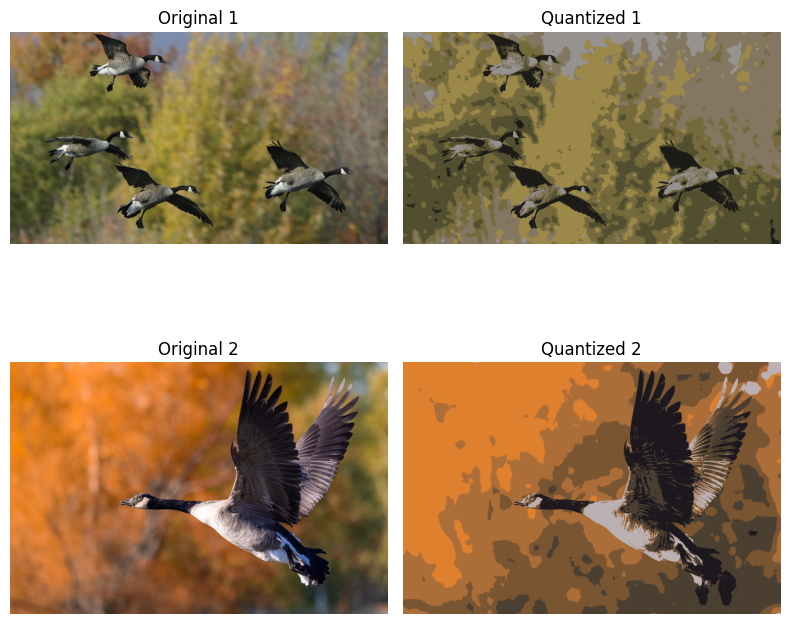

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i in range(2):  # two images
    axes[i, 0].imshow(load_image_from_url(paths[i]))
    axes[i, 0].set_title(f"Original {i+1}")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(quantized[i])
    axes[i, 1].set_title(f"Quantized {i+1}")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

### Side Project?
### I initially didn't fully understand this showcase so I transformed a goose into a duck using Open CV. I thought I spent too much time on this not to showcase it. You can run it below if you want.


- Using manual ROI selection, I mask certain areas and change their colors
- Rescale the image
- Sharpening using a sharpening kernel pulled from online
- Everything is hardcoded


### Anyhow, thank you for your consideration!

In [61]:
import pandas as pd
import numpy as np

from glob import glob

import cv2

import matplotlib.pylab as plt

In [62]:
goose_img = 'images/test/goose.avif'


In [63]:
img_cv2 = cv2.imread(goose_img)
img_cv2_rgb = cv2.cvtColor(img_cv2,cv2.COLOR_BGR2RGB)

In [64]:

r = (723, 123, 1113, 1394)

<function matplotlib.pyplot.show(close=None, block=None)>

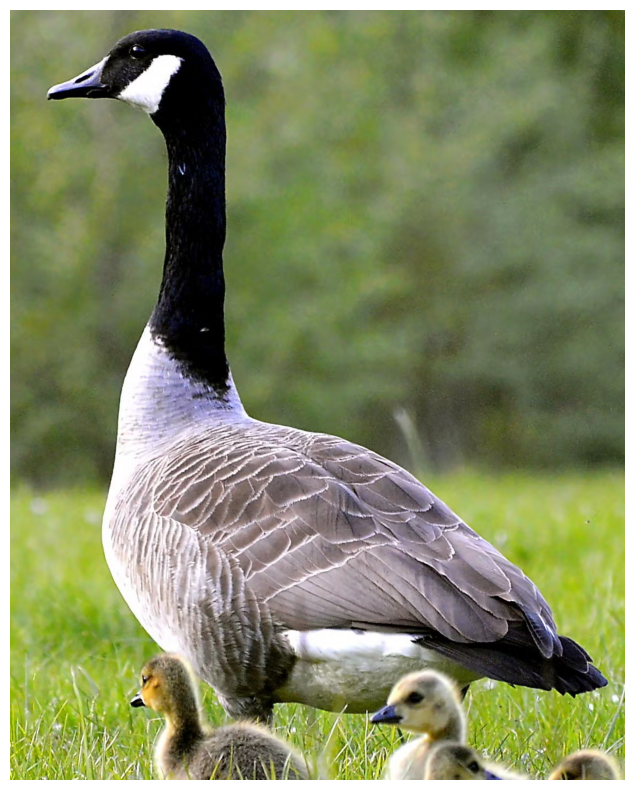

In [65]:
cropped_goose = cropped_img = img_cv2_rgb[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(cropped_goose)
ax.axis('off')
plt.show

In [66]:

neck_roi = (165, 31, 230, 672)

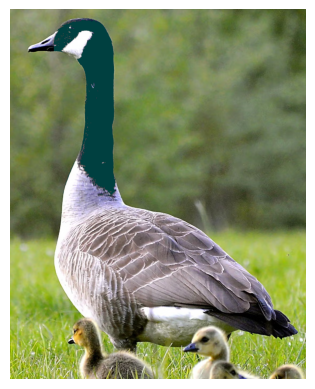

In [ ]:
# Convert to HSV for color masking
neck_img = cropped_goose[int(neck_roi[1]):int(neck_roi[1]+neck_roi[3]), int(neck_roi[0]):int(neck_roi[0]+neck_roi[2])]
hsv = cv2.cvtColor(neck_img, cv2.COLOR_RGB2HSV)

# Mask for dark pixels 
mask = cv2.inRange(hsv, (0,0,0), (180,255,60))
# Apply green color to masked area
edited = neck_img.copy()
edited[mask>0] = [0,64, 64]  # green
cropped_goose[int(neck_roi[1]):int(neck_roi[1]+neck_roi[3]), int(neck_roi[0]):int(neck_roi[0]+neck_roi[2])] = edited
plt.imshow(cropped_goose)
plt.axis("off")
plt.show()

In [68]:

chest_roi = (164, 576, 919, 684)

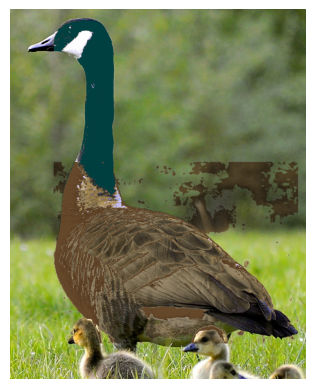

In [ ]:

chest_img = cropped_goose[int(chest_roi[1]):int(chest_roi[1]+chest_roi[3]), 
                          int(chest_roi[0]):int(chest_roi[0]+chest_roi[2])]
hsv = cv2.cvtColor(chest_img, cv2.COLOR_RGB2HSV)

mask = cv2.inRange(hsv, (0, 0, 80), (180, 80, 230))
mask_white = cv2.inRange(hsv,(0,0,200),(180, 40, 255))
hsv_edit = hsv.copy()

hsv_edit[mask > 0, 0] = 20

hsv_edit[mask > 0, 1] = np.clip(hsv[mask > 0, 1] + 60, 0, 255)

# Darken a bit to avoid orange glow
hsv_edit[mask > 0, 2] = np.clip(hsv[mask > 0, 2] - 40, 0, 255)
hsv_edit[mask_white > 0, 0] = 15      # Hue ~15 (reddish brown/orange)
hsv_edit[mask_white > 0, 1] = 150     # Medium saturation (not neon)
hsv_edit[mask_white > 0, 2] = np.clip(hsv[mask_white > 0, 2] * 0.4, 0, 255)
# Convert back to RGB
edited = cv2.cvtColor(hsv_edit, cv2.COLOR_HSV2RGB)

# Replace in original image
cropped_goose[int(chest_roi[1]):int(chest_roi[1]+chest_roi[3]), 
              int(chest_roi[0]):int(chest_roi[0]+chest_roi[2])] = edited

plt.imshow(cropped_goose)
plt.axis("off")
plt.show()

In [70]:
beak_roi = (55, 74, 120, 97)

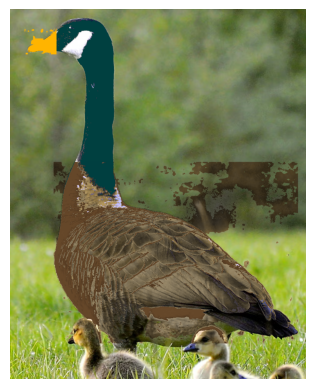

In [ ]:
# Convert to HSV for color masking
beak_img = cropped_goose[int(beak_roi[1]):int(beak_roi[1]+beak_roi[3]), int(beak_roi[0]):int(beak_roi[0]+beak_roi[2])]
hsv = cv2.cvtColor(beak_img, cv2.COLOR_RGB2HSV)

lower_green = (35, 40, 40)
upper_green = (85, 255, 255)
green_mask = cv2.inRange(hsv, lower_green, upper_green)

# Invert: everything NOT green
non_green_mask = cv2.bitwise_not(green_mask)

# Apply green color to masked area
edited = beak_img.copy()
edited[non_green_mask> 0] = [255, 180, 0]  # orange-yellow

cropped_goose[int(beak_roi[1]):int(beak_roi[1]+beak_roi[3]), int(beak_roi[0]):int(beak_roi[0]+beak_roi[2])] = edited
plt.imshow(cropped_goose)
plt.axis("off")
plt.show()

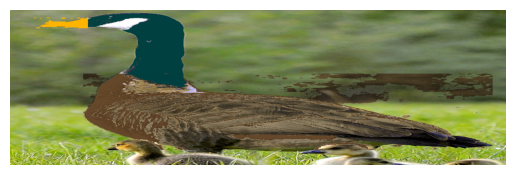

In [72]:
#make goose shorter to become duck

# Scale factors
scale_y = 0.25   # shrink height to 60%
scale_x = 1.0   # keep width the same

new_w = int(cropped_goose.shape[1] * scale_x)
new_h = int(cropped_goose.shape[0] * scale_y)

# Resize
shorter_goose = cv2.resize(cropped_goose, (new_w, new_h))
plt.imshow(shorter_goose)
plt.axis("off")
plt.show()



### Sharpening Kernel (Laplacian-based) 


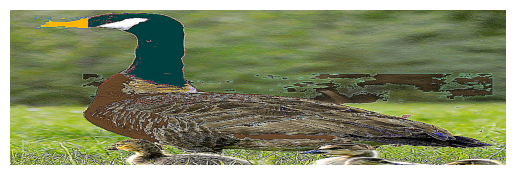

In [75]:
kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])
final_duck = cv2.filter2D(shorter_goose, -1, kernel)
plt.imshow(final_duck)
plt.axis("off")
plt.show()

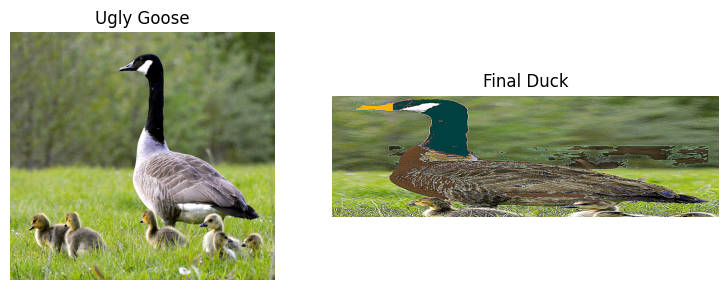

True

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# Display Image 1
axes[0].imshow(plt.imread(goose_img)) 
axes[0].set_title('Ugly Goose')
axes[0].axis('off')                 

# Display Image 2
axes[1].imshow(final_duck) 
axes[1].set_title('Final Duck')
axes[1].axis('off')             

plt.tight_layout()  
plt.show()         
cv2.imwrite("images/test/new_duck.jpg",cv2.cvtColor(final_duck, cv2.COLOR_RGB2BGR))